In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
mu0 = 1.257 *10e-6 # permiability of air
r = 0.01 # radius of the magnet (m)
A = np.pi*r**2 # area of the magnet
R = 5 # resistance in ohms
N = 10000 # number of turns per meter on the coil
l = 0.02 # coil length(m)
# L = 0.1
L = mu0*(N*l)**2*A/l
m = 0.01
g = 9.81
x0 = 0.085
v0 = 5
x_stop = 0.005
x_bottom = 0.2
k_he = 1 # Hall effect sensor scaling from B to V

x_stat = ((2*mu0*N*r**2*v0**2)/(m*g*R**2))**0.25


x0 = x_stat 

n = 10000
ts = np.linspace(0, 1, n)
dt = ts[1] - ts[0]


i = np.zeros(n)
i_d = np.zeros(n)
v = np.ones(n)*v0
x = np.zeros(n)
x_d = np.zeros(n)
x_dd = np.zeros(n)
he_s = np.zeros(n) # Hall Effect Sensor

# i = np.ones(n)*v0/R

x[0] = x0

def coil_sim(x0, ts, v, i):
    x = np.zeros(n)
    x[0] = x0
    for j in np.linspace(start = 0,stop = n-2, num = n-1, dtype = int):     
#         i_d[j] = (v[j] - R*i[j])/L
#         i[j+1] = i[j] + dt*i_d[j]
        F_m = (-4*mu0*N*(r**2)*i[j]**2)/(2*x[j]**4)
        B = (mu0*N*(r**2)*i[j])/(2*x[j]**3)
        if x[j] <= x_stop:
            F_m = 0
            x_d[j] = 0
            he_s[j] = 0

        if x[j] >= x_bottom:
            x_dd[j] = F_m/m
            x_d[j] = 0
        else:
             x_dd[j] = F_m/m + g

        x_d[j+1] = x_d[j] + dt*x_dd[j]
        x[j+1] = x[j] + dt*x_d[j]
        he_s[j+1] = k_he*B
    return x, x_d, x_dd, i, he_s

In [21]:
above = coil_sim(x0 = x_stat - 0.001, ts = ts, v = v, i = np.ones(n)*v0/R)
below = coil_sim(x0 = x_stat + 0.001, ts = ts, v = v, i = np.ones(n)*v0/R)
steady = coil_sim(x0 = x_stat, ts = ts, v = v, i = np.ones(n)*v0/R)


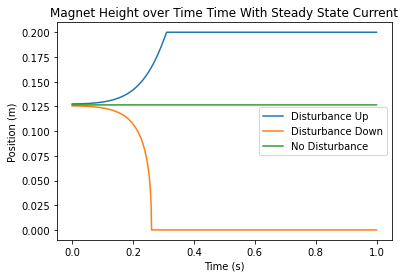

In [30]:
fig = plt.figure()
plt.plot(ts, below[0])
plt.plot(ts, above[0])
plt.plot(ts, steady[0])
x_dd[0]
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Magnet Height over Time Time With Steady State Current')
plt.legend(['Disturbance Up', 'Disturbance Down', 'No Disturbance'])
plt.savefig("sim_stability", dpi = 200)


10000